# Cleaning

In [30]:
import pandas as pd
import re

def clean_lyrics(lyrics):
    if isinstance(lyrics, str):  # Vérifie si les paroles sont une chaîne de caractères
        # Convert to lowercase
        lyrics = lyrics.lower()
        # Remove text within brackets
        lyrics = re.sub(r'\[.*?\]', '', lyrics)
        # Remove extra whitespace
        lyrics = lyrics.strip()
        return lyrics
    return ''  # Retourne une chaîne vide si les paroles ne sont pas une chaîne de caractères

def clean_dataset(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Drop rows with missing lyrics
    df = df.dropna(subset=['Lyrics'])
    
    # Apply cleaning function to the Lyrics column
    df['Lyrics'] = df['Lyrics'].apply(clean_lyrics)
    
    # Remove entries with Lyrics less than 200 characters or empty lyrics
    df = df[df['Lyrics'].str.len() >= 200]

    # Remove entries with Lyrics longer than 10000 characters
    df = df[df['Lyrics'].str.len() <= 10000]
    
    return df

file_path = 'complete_dataset.csv'

cleaned_df = clean_dataset(file_path)

cleaned_df.to_csv('cleaned_dataset.csv', index=False)

print("Le nettoyage des données est terminé. Le fichier cleaned_dataset.csv a été créé.")

Le nettoyage des données est terminé. Le fichier cleaned_dataset.csv a été créé.


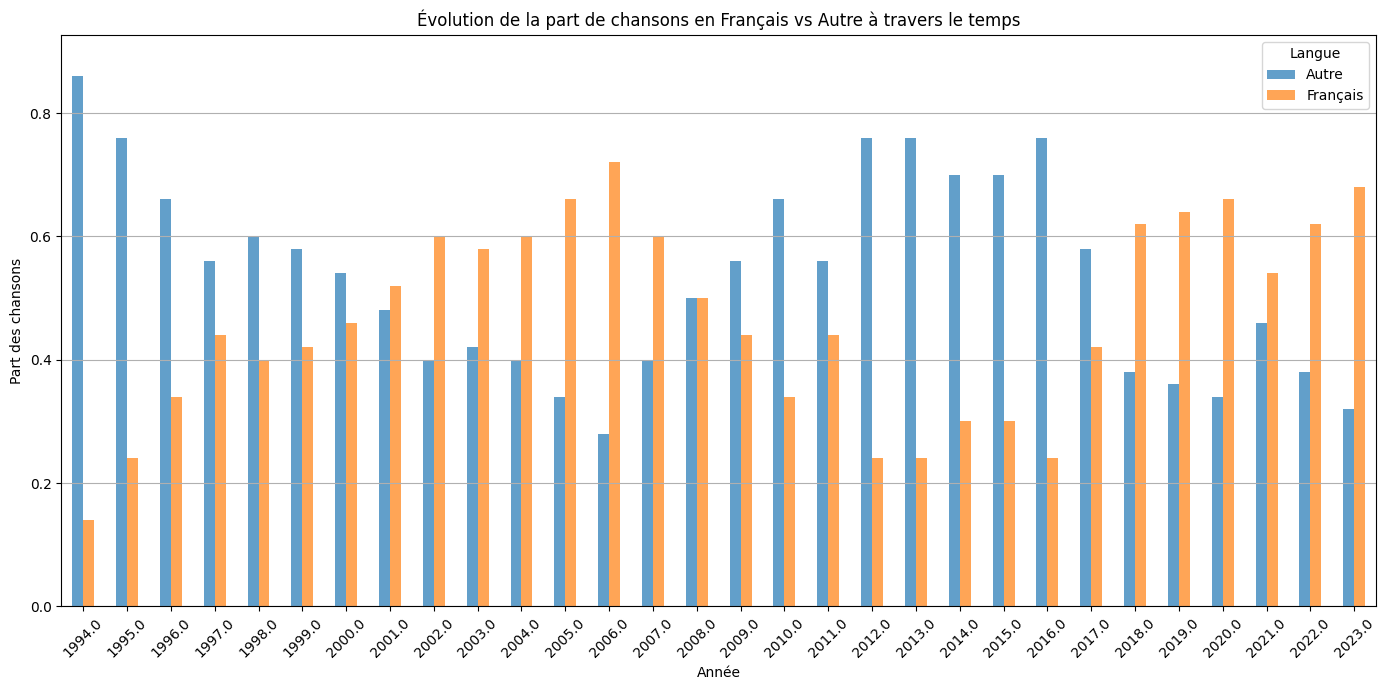

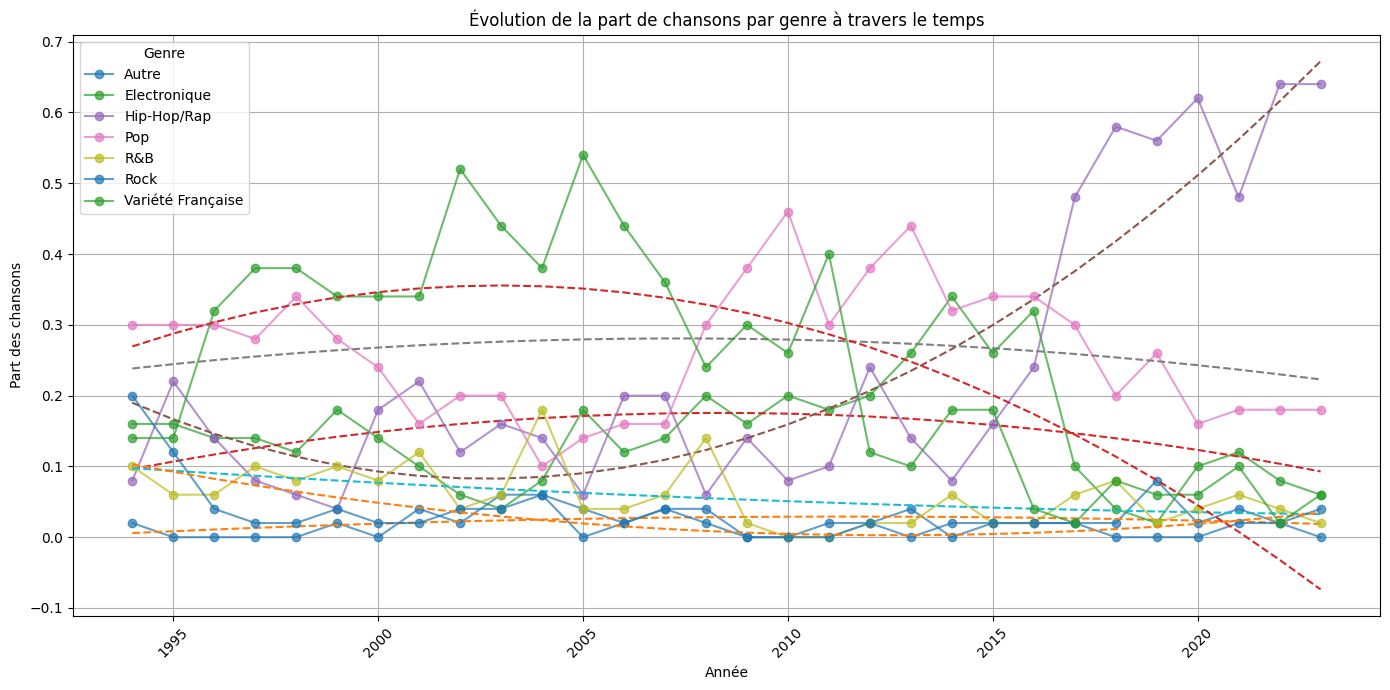

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger le dataset avec les informations supplémentaires
top_50_with_info_csv = "complete_dataset.csv"
top_50_df = pd.read_csv(top_50_with_info_csv)

# Fonction pour calculer la part de chansons par langue (Français vs Autre) et par genre par année
def calculate_metrics(df):
    # Simplifier les catégories de langues en "Français" et "Autre"
    df['Language'] = df['Language'].apply(lambda x: 'Français' if x == 'Français' else 'Autre')
    
    # Calculer le nombre total de chansons par année
    total_songs_per_year = df.groupby('Year').size()
    
    # Calculer le nombre de chansons francophones et autres par année
    language_counts_per_year = df.groupby(['Year', 'Language']).size().unstack(fill_value=0)
    
    # Calculer le nombre de chansons par genre par année
    genre_counts_per_year = df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
    
    # Calculer la part de chansons francophones par année
    language_shares_per_year = language_counts_per_year.div(total_songs_per_year, axis=0)
    
    # Calculer la part de chansons par genre par année
    genre_shares_per_year = genre_counts_per_year.div(total_songs_per_year, axis=0)
    
    return language_shares_per_year, genre_shares_per_year

# Calculer les métriques
language_shares, genre_shares = calculate_metrics(top_50_df)

# Tracer l'évolution de la part de chansons francophones et autres par année (barres)
fig, ax = plt.subplots(figsize=(14, 7))
language_shares.plot(kind='bar', ax=ax, alpha=0.7)
plt.xlabel('Année')
plt.ylabel('Part des chansons')
plt.title('Évolution de la part de chansons en Français vs Autre à travers le temps')
plt.legend(title='Langue')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Ajouter les courbes de tendance de 3ème ordre
for column in language_shares.columns:
    x = language_shares.index.astype(int)
    y = language_shares[column].values
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', label=f'Tendance {column}')

plt.show()

# Tracer l'évolution de la part de chansons par genre par année (lignes)
plt.figure(figsize=(14, 7))
for genre in genre_shares.columns:
    plt.plot(genre_shares.index, genre_shares[genre], marker='o', linestyle='-', label=genre, alpha=0.7)
    
    # Ajouter les courbes de tendance de 3ème ordre
    x = genre_shares.index.astype(int)
    y = genre_shares[genre].values
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--')

plt.xlabel('Année')
plt.ylabel('Part des chansons')
plt.title('Évolution de la part de chansons par genre à travers le temps')
plt.legend(title='Genre')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Misogynie

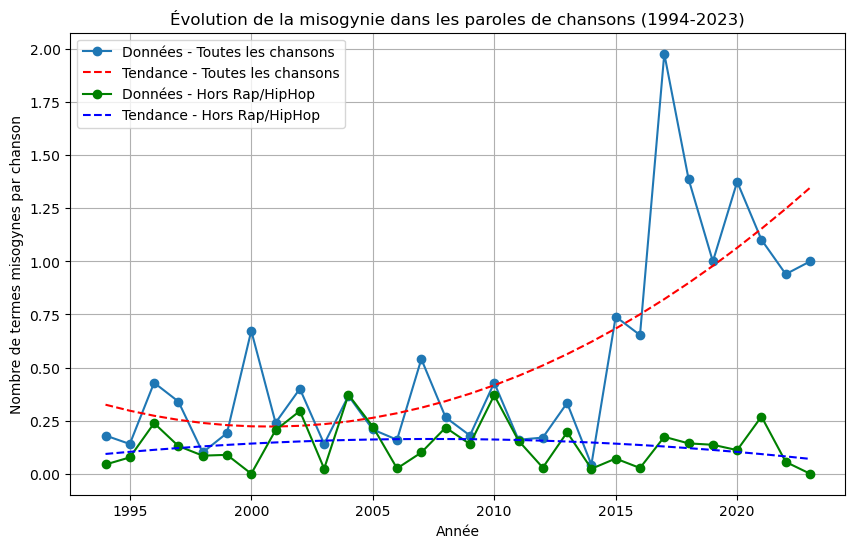

Termes misogynes les plus utilisés par année:
Year
1994.0     motherfuckin
1995.0           biatch
1996.0            bitch
1997.0              ken
1998.0            bimbo
1999.0             hoes
2000.0           putain
2001.0            bitch
2002.0            bitch
2003.0             hoes
2004.0    motherfucking
2005.0            nique
2006.0           putain
2007.0           putain
2008.0            bitch
2009.0         baiserai
2010.0            bitch
2011.0           shawty
2012.0          bitches
2013.0            bitch
2014.0            conne
2015.0            bitch
2016.0            bitch
2017.0           tchoin
2018.0            catin
2019.0           putain
2020.0           baiser
2021.0            bitch
2022.0            nique
2023.0            baise
dtype: object

Genre musical le plus misogyne:
Genre: Hip-Hop/Rap, Termes misogynes par chanson: 1.7635327635327636

Chansons les plus misogynes:
                           Title                Artist    Year        Genre  \
1042

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
dataset_path = 'cleaned_dataset.csv' 
terms_path = 'sexist_terms.json' 

df = pd.read_csv(dataset_path)
with open(terms_path, 'r') as file:
    sexist_terms = json.load(file)

# Prétraiter les données
def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()  # Convertir en minuscules
    lyrics = re.sub(r'[^\w\s]', '', lyrics)  # Retirer la ponctuation
    words = lyrics.split()  # Séparer en mots
    return words

df['Lyrics'] = df['Lyrics'].astype(str).apply(preprocess_lyrics)

# Analyser les paroles
def count_sexist_terms(words, sexist_terms):
    count = 0
    term_counts = {term: 0 for term in sexist_terms}
    for word in words:
        if word in sexist_terms:
            count += 1
            term_counts[word] += 1
    return count, term_counts

# Calculer les termes misogynes et leurs fréquences
df['Sexist_Term_Data'] = df['Lyrics'].apply(lambda words: count_sexist_terms(words, sexist_terms))
df['Sexist_Term_Count'] = df['Sexist_Term_Data'].apply(lambda x: x[0])
df['Term_Frequencies'] = df['Sexist_Term_Data'].apply(lambda x: x[1])

# Agréger les données par année
yearly_data = df.groupby('Year').agg({'Sexist_Term_Count': 'sum', 'Title': 'count'}).reset_index()
yearly_data['Sexist_Terms_Per_Song'] = yearly_data['Sexist_Term_Count'] / yearly_data['Title']

# Filtrer les données pour exclure le Hip-Hop/Rap
non_rap_df = df[~df['Genre'].str.contains('Rap|HipHop', case=False, na=False)]
yearly_non_rap_data = non_rap_df.groupby('Year').agg({'Sexist_Term_Count': 'sum', 'Title': 'count'}).reset_index()
yearly_non_rap_data['Sexist_Terms_Per_Song'] = yearly_non_rap_data['Sexist_Term_Count'] / yearly_non_rap_data['Title']

# Ajuster la régression polynomiale de degré 2 pour les deux ensembles de données
X = yearly_data['Year'].values
Y = yearly_data['Sexist_Terms_Per_Song'].values
polynomial_features = np.polyfit(X, Y, 2)
polynomial_model = np.poly1d(polynomial_features)
yearly_data['Poly_Trend'] = polynomial_model(X)

X_non_rap = yearly_non_rap_data['Year'].values
Y_non_rap = yearly_non_rap_data['Sexist_Terms_Per_Song'].values
polynomial_features_non_rap = np.polyfit(X_non_rap, Y_non_rap, 2)
polynomial_model_non_rap = np.poly1d(polynomial_features_non_rap)
yearly_non_rap_data['Poly_Trend'] = polynomial_model_non_rap(X_non_rap)

# Visualiser les résultats avec une régression polynomiale de degré 2
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Sexist_Terms_Per_Song'], marker='o', label='Données - Toutes les chansons')
plt.plot(yearly_data['Year'], yearly_data['Poly_Trend'], linestyle='--', color='r', label='Tendance - Toutes les chansons')
plt.plot(yearly_non_rap_data['Year'], yearly_non_rap_data['Sexist_Terms_Per_Song'], marker='o', label='Données - Hors Rap/HipHop', color='g')
plt.plot(yearly_non_rap_data['Year'], yearly_non_rap_data['Poly_Trend'], linestyle='--', color='b', label='Tendance - Hors Rap/HipHop')

plt.xlabel('Année')
plt.ylabel('Nombre de termes misogynes par chanson')
plt.title('Évolution de la misogynie dans les paroles de chansons (1994-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Termes misogynes les plus utilisés par année
term_frequencies_by_year = df.explode('Lyrics').groupby(['Year', 'Lyrics']).size().unstack(fill_value=0)
sexist_term_frequencies_by_year = term_frequencies_by_year.loc[:, term_frequencies_by_year.columns.isin(sexist_terms)]
most_used_terms_by_year = sexist_term_frequencies_by_year.idxmax(axis=1)

# Genre le plus misogyne
genre_sexism = df.groupby('Genre').agg({'Sexist_Term_Count': 'sum', 'Title': 'count'}).reset_index()
genre_sexism['Sexist_Terms_Per_Song'] = genre_sexism['Sexist_Term_Count'] / genre_sexism['Title']
most_sexist_genre = genre_sexism.loc[genre_sexism['Sexist_Terms_Per_Song'].idxmax()]

# Chansons les plus misogynes
most_sexist_songs = df.sort_values(by='Sexist_Term_Count', ascending=False).head(10)

# Calculer le nombre moyen de termes misogynes par chanson hors Rap/HipHop
mean_sexist_terms_non_rap = non_rap_df['Sexist_Term_Count'].mean()

# Termes misogynes les plus utilisés par année pour chansons hors Rap/HipHop
non_rap_term_frequencies_by_year = non_rap_df.explode('Lyrics').groupby(['Year', 'Lyrics']).size().unstack(fill_value=0)
non_rap_sexist_term_frequencies_by_year = non_rap_term_frequencies_by_year.loc[:, non_rap_term_frequencies_by_year.columns.isin(sexist_terms)]
most_used_non_rap_terms_by_year = non_rap_sexist_term_frequencies_by_year.idxmax(axis=1)

# Affichage des résultats
print("Termes misogynes les plus utilisés par année:")
print(most_used_terms_by_year)

print("\nGenre musical le plus misogyne:")
print(f"Genre: {most_sexist_genre['Genre']}, Termes misogynes par chanson: {most_sexist_genre['Sexist_Terms_Per_Song']}")

print("\nChansons les plus misogynes:")
print(most_sexist_songs[['Title', 'Artist', 'Year', 'Genre', 'Sexist_Term_Count']])

print("\nStatistiques supplémentaires:")
print(f"Nombre total de termes misogynes: {df['Sexist_Term_Count'].sum()}")
print(f"Nombre moyen de termes misogynes par chanson: {df['Sexist_Term_Count'].mean()}")
print(f"Année avec le plus de termes misogynes: {yearly_data.loc[yearly_data['Sexist_Term_Count'].idxmax()]['Year']}")
print(f"Année avec le moins de termes misogynes: {yearly_data.loc[yearly_data['Sexist_Term_Count'].idxmin()]['Year']}")

print("\nStatistiques des chansons hors Rap/HipHop:")
print(f"Nombre total de termes misogynes (hors Rap/HipHop): {non_rap_df['Sexist_Term_Count'].sum()}")
print(f"Nombre moyen de termes misogynes par chanson (hors Rap/HipHop): {mean_sexist_terms_non_rap}")
print(f"Année avec le plus de termes misogynes (hors Rap/HipHop): {yearly_non_rap_data.loc[yearly_non_rap_data['Sexist_Term_Count'].idxmax()]['Year']}")
print(f"Année avec le moins de termes misogynes (hors Rap/HipHop): {yearly_non_rap_data.loc[yearly_non_rap_data['Sexist_Term_Count'].idxmin()]['Year']}")
print("Termes misogynes les plus utilisés par année (hors Rap/HipHop):")
print(most_used_non_rap_terms_by_year)
